In [3]:
import requests
import sys
import webbrowser
from bs4 import BeautifulSoup
from urllib.request import urlopen

Utilizamos la herramineta de SERP API

In [4]:
##### En esta celda corremos la busqueda de 200 resultados de cada uno de los queries

from serpapi import GoogleSearch

API_key=''

queries=['recibo cfe','tarifas de luz cfe','cfe gratis','factura de luz cfe','alta cfe','cfe',
         'pgar cfe','descuentos cfe','deuda cfe','cortar luz cfe','factura cfe','recibo de luz cfe','cfe sucursales']

organic_results=[]


for query in queries:
    for i in range(1,200,10):
        params = {
        "q": query,
        "api_key": API_key,
        'gl':'mx',
        'start':i,}

        search = GoogleSearch(params)
        result = search.get_dict()
        try:
            organic_results.append(result['organic_results'])
        except:
            pass
    

https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
h

In [8]:
#### Analizamos los resultados de la busqeuda

from itertools import chain
import pandas as pd
import re
import numpy as np

final_list=list(chain.from_iterable(organic_results))
links=[]
for result in final_list:
    links.append(result['displayed_link'])

clean_links=[]

for link in links:
    clean_links.append(re.sub(" .*", "", link))

print('We get',len(set(clean_links)),'clean links out of a total of', len(links),'links')

We get 1544 clean links out of a total of 1544 links.


In [12]:
### Una vez obtenidos los links, limpiamos:
# Step 1: Quitamos los websites no seguros ("http:"")

import re

DB_Links=pd.DataFrame()

DB_Links['Link']=np.unique(clean_links)
DB_Links['SecureWebsite']='Secure'

pattern=re.compile(r'http:')

a=0
for link in DB_Links['Link']:
    if re.match(r'http:',link):
        DB_Links['SecureWebsite'][a]='Not Secure'
    a+=1
    
DB_Links=DB_Links[DB_Links['SecureWebsite']=='Secure']

In [13]:
# Step 2: Identificamos URLs con terminos relacionados

DB_Links=pd.DataFrame()

###
DB_Links['Link']=np.unique(clean_links)

###
a=0
matches = ["cfe", "recibo",'tarifa']
DB_Links['Related_URL']=0

for i in range(len(DB_Links['Related_URL'])):
    if any(x in DB_Links.iloc[i,0] for x in matches):
        DB_Links.iloc[i,1]=1


In [16]:
import pandas as pd
DB_RF=pd.read_excel('CFE.xlsx')
DB_RF=DB_RF.drop(columns=['No_relacionada','Related_URL'])
DB_RF

,Unnamed: 0,Link,SponsoredLegend,GoogleAds,Inputs,TTR,Upper_share,Symbols,Symbols_share,Noun_share,Adj_share,Verb_share,Falsa
0,0,http://159.16.244.43,0,0,0,1.000000,0.038462,0,0.000000,0.461538,0.000000,0.000000,0
1,1,http://cfe.uc.pt,0,0,0,0.909091,0.062500,0,0.000000,0.625000,0.000000,0.062500,0
2,2,http://cfecapital.com.mx,0,0,0,0.630713,0.049123,5,0.005848,0.440936,0.046784,0.031579,0
3,3,http://cfectiva.cfe.gob.mx,0,0,0,1.000000,0.000000,0,0.000000,0.500000,0.000000,0.000000,0
4,4,http://chihuahua.gob.mx,0,0,0,0.651163,0.016966,0,0.000000,0.469062,0.038922,0.020958,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,https://www.yucatan.com.mx,0,0,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0
596,596,https://www.yza.mx,0,0,0,0.471820,0.023553,12,0.005888,0.433268,0.026006,0.045633,0
597,597,https://www.zacatecas.gob.mx,0,0,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0
598,598,https://www.zonacentronoticias.com,0,0,0,0.573894,0.040909,15,0.009740,0.394805,0.055844,0.052597,0


In [50]:
from urllib.request import urlopen, Request

import requests
import sys
import webbrowser
from bs4 import BeautifulSoup
from urllib.request import urlopen

req = Request(url="https://cfe-recibos.com.mx/", headers={'user-agent': 'my-app/0.0.1'}) 
html = urlopen(req)
soup = BeautifulSoup(html.read(), "html.parser")
len(soup.find_all('ins',{'src':'adsbygoogle'}))

0

In [ ]:
# Step 3: Identyfying Number of Google Ads and input boxes

from urllib.request import urlopen, Request

DB_Links=DB_RF.copy()

DB_Links['SponsoredLegend']=0
DB_Links['GoogleAds']=0
DB_Links['Inputs']=0


SponsoredLegend=[]
GoogleAds=[]
Inputs=[]

for i in range(len(DB_Links.index)):
    try:
        req = Request(url=DB_Links.iloc[i,1], headers={'user-agent': 'my-app/0.0.1'})
        html = urlopen(req)
        soup = BeautifulSoup(html.read(), "html.parser")
        mydivs = soup.find_all('span',{'class':'sponsored-legend'})
        mydivs2 = soup.find_all('ins',{'class':'adsbygoogle'})
        mydivs3 = soup.find_all('input')
        
        SponsoredLegend.append(len(mydivs))
        GoogleAds.append(mydivs2)
        Inputs.append(mydivs3)
    except:
        pass



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


In [54]:
DB_Links.iloc[:,3]

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: GoogleAds, Length: 600, dtype: int64

In [55]:
DB_Links.sort_values(by=['GoogleAds'], ascending=False).head(50)

,Unnamed: 0,Link,SponsoredLegend,GoogleAds,Inputs,TTR,Upper_share,Symbols,Symbols_share,Noun_share,Adj_share,Verb_share,Falsa
335,335,https://www.cfe-recibo.com.mx,0,5,0,0.0,0.010241,12,0.001182,0.527326,0.025997,0.042836,1
0,0,http://159.16.244.43,0,0,0,0.0,0.038462,0,0.000000,0.461538,0.000000,0.000000,0
404,404,https://www.elfinanciero.com.mx,0,0,0,0.0,0.028699,180,0.019642,0.429507,0.047796,0.064055,0
397,397,https://www.efactura.dgi.gub.uy,0,0,0,61.0,0.014388,0,0.000000,0.481360,0.033355,0.026815,0
398,398,https://www.ejecentral.com.mx,0,0,0,2.0,0.017490,14,0.005323,0.366160,0.038403,0.042586,0
399,399,https://www.el-heraldo-bajio.com,0,0,0,1.0,0.003911,21,0.002649,0.634540,0.033052,0.032169,0
400,400,https://www.elcontribuyente.mx,0,0,0,6.0,0.021874,12,0.004375,0.438935,0.037550,0.040102,0
401,401,https://www.eleconomista.com.mx,0,0,0,8.0,0.025497,17,0.006374,0.397825,0.041995,0.049119,0
402,402,https://www.electrico.com.mx,0,0,0,6.0,0.011584,11,0.004111,0.497384,0.047459,0.028027,0
403,403,https://www.elespanol.com,0,0,0,4.0,0.018787,78,0.009578,0.439219,0.036837,0.045309,0


In [45]:

DB_Links[DB_Links['GoogleAds']>0]

,Unnamed: 0,Link,SponsoredLegend,GoogleAds,Inputs,TTR,Upper_share,Symbols,Symbols_share,Noun_share,Adj_share,Verb_share,Falsa
335,335,https://www.cfe-recibo.com.mx,0,5,0,0.0,0.010241,12,0.001182,0.527326,0.025997,0.042836,1


In [19]:

req = Request('https://app-cfe.mx/', headers={'user-agent': 'my-app/0.0.1'}) 
html = urlopen(req)
soup = BeautifulSoup(html.read(), "html.parser")
mydivs = soup.find_all('span',{'class':'sponsored-legend'})
mydivs2 = soup.find_all('ins',{'class':'adsbygoogle'})
mydivs3 = soup.find_all('input')

print(len(mydivs),len(mydivs2),len(mydivs3))

0 1 0


In [21]:
DB_Links.sort_values(by=['Related_URL'], ascending=False).head(50)

,Link,Related_URL,SponsoredLegend,GoogleAds,Inputs
300,https://www.acfe.com,1,0,0,0
335,https://www.cfe-recibo.com.mx,1,0,5,0
337,https://www.cfe.be,1,0,0,0
338,https://www.cfe.fr,1,0,0,0
29,http://www.cfe.edu.uy,1,0,0,0
60,https://app-cfe.mx,1,0,0,1
340,https://www.cfecgc.org,1,0,0,0
341,https://www.cfecontrol.com,1,0,0,0
342,https://www.cfemedia.com,1,0,0,0
343,https://www.cfenergia.com,1,0,0,0


In [30]:
### Step 4: Text analysis

DB_Links['TTR']=0
DB_Links['Upper_share']=0
DB_Links['Symbols']=0
DB_Links['Symbols_share']=0
DB_Links['Noun_share']=0
DB_Links['Adj_share']=0
DB_Links['Verb_share']=0

for i in range(len(DB_Links['SponsoredLegend'])):
    req = Request(url=DB_Links.iloc[i,0], headers={'user-agent': 'my-app/0.0.1'}) 
    try:
        html = urlopen(req)
        text=soup.get_text()

        from itertools import chain
        import pandas as pd
        import re
        import numpy as np
        import requests
        import sys
        import webbrowser
        from bs4 import BeautifulSoup
        from urllib.request import urlopen
        from nltk.tokenize.treebank import TreebankWordTokenizer


        # Paso 1: Bajar html del URL
        req = Request(url=DB_Links.iloc[i,0], headers={'user-agent': 'my-app/0.0.1'}) 
        html = urlopen(req)
        soup = BeautifulSoup(html.read(), "html.parser")
        text=soup.get_text()

        # Paso 2: Procesamiento del texto

        import nltk
        from nltk.tokenize import word_tokenize
        from nltk.tokenize import sent_tokenize
        from nltk.corpus import stopwords
        from nltk.stem import PorterStemmer
        from nltk.stem import WordNetLemmatizer
        from nltk.sentiment.util import mark_negation
        import string
        from sklearn.feature_extraction.text import CountVectorizer
        from sklearn.feature_extraction.text import TfidfVectorizer
        from nltk.corpus import wordnet as wn


        def word_tokenize_rempunc(stringin):
            return [word for word in word_tokenize(stringin) if word.isalnum()]


        wt3=word_tokenize_rempunc(text)
        stop_words = set(stopwords.words('spanish'))
        wt4 = [w for w in wt3 if not w in stop_words]

        text=text.translate(str.maketrans(' ', ' ', string.punctuation))

        wt = word_tokenize(text)

        special_characters=[word for word in wt if not word.isalnum()]
        plain_text=[word for word in wt if word.isalnum()]

        from nltk.tokenize.treebank import TreebankWordDetokenizer

        text2=TreebankWordDetokenizer().tokenize(plain_text)

        ### Removing stopwords and stemming, getting TTR

        from nltk.corpus import stopwords

        stop_words = set(stopwords.words('spanish'))

        text3 = [w for w in plain_text if not w in stop_words]

        from nltk import word_tokenize
        from nltk.stem import SnowballStemmer
        from collections import Counter
        import spacy
        from spacy import displacy
        import pandas as pd
        from spacy.lang.es.examples import sentences 

        nlp = spacy.load('es_core_news_md')

        document=nlp(text)

        stemmer=SnowballStemmer('spanish')

        text3= [stemmer.stem(w) for w in text3]

        types=Counter(text3)
        tokens=len(text3)

        TTR=len(types)/tokens
        Symbols=len(special_characters)
        Symbols_share=len(special_characters)/len(document)



        #### Analysis with spacy

        nlp = spacy.load('es_core_news_md')

        pd.set_option("max_rows", 400)
        pd.set_option("max_colwidth", 400)

        adjs = []
        uppercases=0
        total_tokens=0
        adjs=[]
        nouns=[]
        verbs=[]
        symbols=[]

        document=nlp(text)

        for token in document:
            if str(token).isupper():
                uppercases+=1
            if token.pos_ == 'NOUN' or token.pos_ == 'PROPN':
                nouns.append(token.lemma_)
            if token.pos_ == 'ADJ':
                adjs.append(token.lemma_)
            if token.pos_ == 'VERB':
                verbs.append(token.lemma_)
            if token.pos_ == 'SYM':
                symbols.append(token.lemma_)


        upper_share=uppercases/len(document)
        noun_share=len(nouns)/len(document)
        adj_share=len(adjs)/len(document)
        verb_share=len(verbs)/len(document)


        # Results:

        print(TTR,upper_share,Symbols, Symbols_share,noun_share,adj_share,verb_share)
        DB_Links.iloc[i,3]=len(mydivs)
        DB_Links.iloc[i,4]=len(mydivs2)
        DB_Links.iloc[i,5]=len(mydivs3)
        DB_Links.iloc[i,5]=TTR
        DB_Links.iloc[i,6]=upper_share
        DB_Links.iloc[i,7]=Symbols
        DB_Links.iloc[i,8]=Symbols_share
        DB_Links.iloc[i,9]=noun_share
        DB_Links.iloc[i,10]=adj_share
        DB_Links.iloc[i,11]=verb_share
    except:
        pass
DB_Links

1.0 0.038461538461538464 0 0.0 0.46153846153846156 0.0 0.0
0.9090909090909091 0.0625 0 0.0 0.625 0.0 0.0625
0.6307129798903108 0.04912280701754386 5 0.005847953216374269 0.4409356725146199 0.04678362573099415 0.031578947368421054
1.0 0.0 0 0.0 0.5 0.0 0.0
0.6511627906976745 0.016966067864271458 0 0.0 0.469061876247505 0.038922155688622756 0.020958083832335328
0.46242559523809523 0.1656486684583435 27 0.006596628389934034 0.39677498167603226 0.03591497678964085 0.040312729049596874


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


1.0 0.09359756097560976 175 0.053353658536585365 0.8185975609756098 0.0039634146341463415 0.001829268292682927
0.8571428571428571 0.0 0 0.0 0.75 0.041666666666666664 0.041666666666666664
0.5416359616801769 0.04765921552087727 23 0.009700548291859975 0.4065795023196963 0.043441585828764236 0.021931674398987768
0.9508816120906801 0.7664670658682635 0 0.0 0.7736526946107785 0.06826347305389222 0.033532934131736525
0.5349959774738536 0.014992503748125937 11 0.005497251374312844 0.41679160419790107 0.06596701649175413 0.046476761619190406
0.4723294723294723 0.021343873517786563 5 0.003952569169960474 0.35889328063241105 0.05928853754940711 0.03399209486166008
0.7445652173913043 0.04180064308681672 0 0.0 0.4533762057877814 0.03536977491961415 0.03858520900321544
0.17058353317346123 0.01233598743972188 11 0.001233598743972188 0.4938880789503196 0.021195469328249412 0.014466748906582932
0.40186915887850466 0.008741258741258742 3 0.0026223776223776225 0.5122377622377622 0.06818181818181818 0.03

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


0.44781553398058255 0.04056047197640118 5 0.003687315634218289 0.39601769911504425 0.038348082595870206 0.045722713864306784
0.41787813176616145 0.007364975450081833 354 0.05793780687397709 0.2713584288052373 0.0353518821603928 0.0381342062193126
0.3422413793103448 0.025835866261398176 18 0.00911854103343465 0.375886524822695 0.0547112462006079 0.06889564336372847
0.4745308310991957 0.02431259044862518 60 0.017366136034732273 0.2804630969609262 0.06628075253256151 0.08306801736613603
0.8285714285714286 0.024793388429752067 0 0.0 0.45454545454545453 0.0 0.01652892561983471
0.7425149700598802 0.04895104895104895 6 0.02097902097902098 0.45454545454545453 0.045454545454545456 0.04195804195804196
1.0 0.0 0 0.0 0.3333333333333333 0.0 0.0
0.538269550748752 0.008767123287671232 10 0.005479452054794521 0.4575342465753425 0.040547945205479455 0.033424657534246574
0.5052546483427648 0.03224181360201511 7 0.003526448362720403 0.49370277078085645 0.03828715365239295 0.015113350125944584
0.649501661

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


1.0 0.09821583232288239 315 0.05456435129049021 0.8240083145678156 0.0019054217910964837 0.002944742768058202
0.6733067729083665 0.029787234042553193 0 0.0 0.42127659574468085 0.010638297872340425 0.00425531914893617
0.35294117647058826 0.014335145823035097 6 0.002965892239248641 0.4913494809688581 0.01828966880869995 0.02619871478002966
0.24473947895791584 0.012876523338698551 12 0.0027592550011496897 0.5861117498275465 0.022074040009197517 0.01448608875603587
0.47477624084621645 0.03332444681418288 93 0.024793388429752067 0.45587843241802184 0.03199146894161557 0.045587843241802185
0.8549488054607508 0.008759124087591242 0 0.0 0.7197080291970803 0.008759124087591242 0.04525547445255475
0.31485849056603776 0.03307086614173228 27 0.02125984251968504 0.46771653543307085 0.08110236220472442 0.03307086614173228
0.6073094867807154 0.0308839190628328 5 0.0026624068157614484 0.4802981895633653 0.041001064962726305 0.03407880724174654
0.5511758118701008 0.005722239406124343 48 0.0074234457160

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


0.8518518518518519 0.09205811710044494 1407 0.05540024412332165 0.8169862582194748 0.0026381068630153166 0.0023231090286254283
0.711864406779661 0.023411371237458192 0 0.0 0.47491638795986624 0.030100334448160536 0.010033444816053512
0.5270092226613966 0.02232729183083793 24 0.006304176516942475 0.4223798266351458 0.03362227475702653 0.04885736800630418
0.5335542667771334 0.05621979140167896 127 0.03230730094123633 0.41160010175527856 0.04986008649198677 0.048588145510048336
0.5065502183406113 0.009070294784580499 31 0.008786848072562359 0.4532312925170068 0.031179138321995464 0.031462585034013606
0.6091703056768559 0.05255878284923928 30 0.04149377593360996 0.43568464730290457 0.022130013831258646 0.06639004149377593
0.3804878048780488 0.0070830650354153256 9 0.005795235028976175 0.4481648422408242 0.05795235028976175 0.05344494526722473
0.37226101613291596 0.10572424091587855 4 0.00039820806371329017 0.5602787456445993 0.04340467894474863 0.010950721752115481
0.4031719532554257 0.018

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


1.0 0.09229323308270676 932 0.05839598997493734 0.8169799498746867 0.0030075187969924814 0.0016917293233082707
0.5425065731814198 0.019648938957296306 68 0.017815037987948652 0.39009693476552265 0.05501702908042966 0.050825255436206446
0.6415797317436661 0.0223463687150838 8 0.0034379028792436614 0.37816931671680276 0.05801461108723679 0.0618822518263859
0.5054059783760865 0.023891273247496424 36 0.005150214592274678 0.4728183118741059 0.026037195994277538 0.0357653791130186
0.4076399790685505 0.012285012285012284 16 0.005616005616005616 0.41944541944541947 0.03088803088803089 0.03088803088803089
0.3443673251468233 0.022173754998182478 5 0.0018175209014903672 0.5561613958560524 0.010905125408942203 0.009451108687749909
0.35525826830174656 0.011206671879072191 7 0.0018243419338024498 0.5913474068282513 0.014594735470419598 0.00547302580140735
0.1823592730956753 0.007191838100016725 46 0.00192339856163238 0.5319869543401907 0.020572002007024585 0.014300050175614651
0.3422413793103448 0.0

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


0.5501930501930502 0.020833333333333332 6 0.007352941176470588 0.49387254901960786 0.03553921568627451 0.011029411764705883
0.5079470198675496 0.01237842617152962 32 0.014146772767462422 0.46374889478337755 0.03713527851458886 0.03536693191865606
0.7358490566037735 0.08641975308641975 2 0.024691358024691357 0.48148148148148145 0.024691358024691357 0.012345679012345678
0.5092838196286472 0.010241260462826194 12 0.0011816838995568684 0.5273264401772526 0.025997045790251107 0.04283604135893648
0.4643734643734644 0.05136106831022085 37 0.019003595274781716 0.41037493579866463 0.03543913713405239 0.08936825885978428
0.5789473684210527 0.054929577464788736 10 0.014084507042253521 0.5492957746478874 0.02676056338028169 0.03380281690140845
0.3021367521367521 0.16132521974306965 29 0.00392156862745098 0.4466531440162272 0.054090601757944556 0.021636240703177823
0.6412213740458015 0.11403508771929824 6 0.005263157894736842 0.5096491228070176 0.037719298245614034 0.02894736842105263
0.45395683453

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


1.0 0.09467023606716962 688 0.05581244422811714 0.8140666828912144 0.0023525594224061003 0.0016224547740731727
0.42193738180289975 0.006010928961748634 9 0.001639344262295082 0.34098360655737703 0.02459016393442623 0.030783242258652095
0.34429894602363464 0.0065237651444548 16 0.003727865796831314 0.44547996272134205 0.05149114631873253 0.04263746505125816
0.24027163131390203 0.004061171394123993 32 0.0020305856970619963 0.5563170251919538 0.028555111364934323 0.02233644266768196
1.0 0.0 0 0.0 0.3333333333333333 0.0 0.0
0.5354330708661418 0.009670079635949944 4 0.0022753128555176336 0.5329920364050057 0.044937428896473265 0.03526734926052332
0.6744186046511628 0.006896551724137931 7 0.008045977011494253 0.34022988505747126 0.026436781609195402 0.07931034482758621
0.46374476313245244 0.01737193763919822 23 0.005122494432071269 0.49933184855233853 0.028062360801781736 0.042316258351893093
0.4462729912875121 0.05754908598510494 45 0.015233581584292485 0.516926201760325 0.04231550440081245

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


1.0 0.09821583232288239 315 0.05456435129049021 0.8240083145678156 0.0019054217910964837 0.002944742768058202
0.4939200926462073 0.027797576621525304 6 0.0010691375623663579 0.46115466856735565 0.02120456165359943 0.022808267997148968
0.4613625971650663 0.0388011774150388 26 0.006957452502006957 0.3842654535723843 0.04495584693604496 0.05432164838105432
0.6044381107491856 0.014254781667268134 31 0.005593648502345724 0.5609888127029953 0.04547094911584266 0.03753157704799711
0.6326070623591284 0.031407035175879394 79 0.0330820770519263 0.4045226130653266 0.0347571189279732 0.035175879396984924
0.5004578754578755 0.020413949532180325 22 0.0062375956903884325 0.3651828749645591 0.046498440601077405 0.05954068613552594
0.4725609756097561 0.0855431993156544 11 0.009409751924721984 0.3763900769888794 0.04704875962360992 0.07784431137724551
0.4718196457326892 0.023552502453385672 12 0.005888125613346418 0.43326790971540724 0.026005888125613347 0.04563297350343474
0.5738942826321467 0.04090909

,Link,Related_URL,SponsoredLegend,GoogleAds,Inputs,TTR,Upper_share,Symbols,Symbols_share,Noun_share,Adj_share,Verb_share
0,http://159.16.244.43,0,0,0,0,1.000000,0.038462,0,0.000000,0.461538,0.000000,0.000000
1,http://cfe.uc.pt,1,0,0,0,0.909091,0.062500,0,0.000000,0.625000,0.000000,0.062500
2,http://cfecapital.com.mx,1,0,0,0,0.630713,0.049123,5,0.005848,0.440936,0.046784,0.031579
3,http://cfectiva.cfe.gob.mx,1,0,0,0,1.000000,0.000000,0,0.000000,0.500000,0.000000,0.000000
4,http://chihuahua.gob.mx,0,0,0,0,0.651163,0.016966,0,0.000000,0.469062,0.038922,0.020958
...,...,...,...,...,...,...,...,...,...,...,...,...
595,https://www.yucatan.com.mx,0,0,0,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000
596,https://www.yza.mx,0,0,0,0,0.471820,0.023553,12,0.005888,0.433268,0.026006,0.045633
597,https://www.zacatecas.gob.mx,0,0,0,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000
598,https://www.zonacentronoticias.com,0,0,0,0,0.573894,0.040909,15,0.009740,0.394805,0.055844,0.052597


In [31]:
DB_Links.sort_values(by=['Related_URL'], ascending=False).head(50)

,Link,Related_URL,SponsoredLegend,GoogleAds,Inputs,TTR,Upper_share,Symbols,Symbols_share,Noun_share,Adj_share,Verb_share
300,https://www.acfe.com,1,0,0,0,0.344367,0.022174,5,0.001818,0.556161,0.010905,0.009451
335,https://www.cfe-recibo.com.mx,1,0,0,0,0.509284,0.010241,12,0.001182,0.527326,0.025997,0.042836
337,https://www.cfe.be,1,0,0,0,0.578947,0.054930,10,0.014085,0.549296,0.026761,0.033803
338,https://www.cfe.fr,1,0,0,0,0.302137,0.161325,29,0.003922,0.446653,0.054091,0.021636
29,http://www.cfe.edu.uy,1,0,0,0,0.505255,0.032242,7,0.003526,0.493703,0.038287,0.015113
60,https://app-cfe.mx,1,0,0,0,0.407200,0.024367,47,0.007437,0.353956,0.046835,0.084652
340,https://www.cfecgc.org,1,0,0,0,0.453957,0.055691,60,0.029311,0.495848,0.045432,0.023449
341,https://www.cfecontrol.com,1,0,0,0,0.495072,0.016632,11,0.003267,0.612415,0.026730,0.037422
342,https://www.cfemedia.com,1,0,0,0,0.493470,0.020586,14,0.011085,0.751386,0.018211,0.017419
343,https://www.cfenergia.com,1,0,0,0,0.510516,0.015803,7,0.004425,0.492415,0.052465,0.027813


In [1]:
DB_Links.to_excel('CFE.xlsx')

NameError: name 'DB_Links' is not defined

In [3]:
import pandas as pd
DB_RF=pd.read_excel('CFE.xlsx')
DB_RF=DB_RF.drop(columns=['No_relacionada','Related_URL'])
DB_RF

,Unnamed: 0,Link,SponsoredLegend,GoogleAds,Inputs,TTR,Upper_share,Symbols,Symbols_share,Noun_share,Adj_share,Verb_share,Falsa
0,0,http://159.16.244.43,0,0,0,1.000000,0.038462,0,0.000000,0.461538,0.000000,0.000000,0
1,1,http://cfe.uc.pt,0,0,0,0.909091,0.062500,0,0.000000,0.625000,0.000000,0.062500,0
2,2,http://cfecapital.com.mx,0,0,0,0.630713,0.049123,5,0.005848,0.440936,0.046784,0.031579,0
3,3,http://cfectiva.cfe.gob.mx,0,0,0,1.000000,0.000000,0,0.000000,0.500000,0.000000,0.000000,0
4,4,http://chihuahua.gob.mx,0,0,0,0.651163,0.016966,0,0.000000,0.469062,0.038922,0.020958,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,https://www.yucatan.com.mx,0,0,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0
596,596,https://www.yza.mx,0,0,0,0.471820,0.023553,12,0.005888,0.433268,0.026006,0.045633,0
597,597,https://www.zacatecas.gob.mx,0,0,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0
598,598,https://www.zonacentronoticias.com,0,0,0,0.573894,0.040909,15,0.009740,0.394805,0.055844,0.052597,0


In [4]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve
from sklearn import tree
import matplotlib.pyplot as plt

In [5]:
DB_RF=pd.read_excel('CFE.xlsx')
DB_RF=DB_RF.drop(columns=['Unnamed: 0','No_relacionada'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(DB_RF.drop(columns=['Falsa']), DB_RF['Falsa'].astype(int), 
                                                    test_size = 0.33, 
                                                    random_state = 1)

In [7]:
RFmodel=RandomForestClassifier(n_estimators=500, oob_score=True,class_weight="balanced").fit(X_train.drop(columns=['Link']),y_train)
yhat=RFmodel.predict(X_test.drop(columns=['Link']))
y_probs=RFmodel.predict_proba(X_test.drop(columns=['Link']))[:,1]

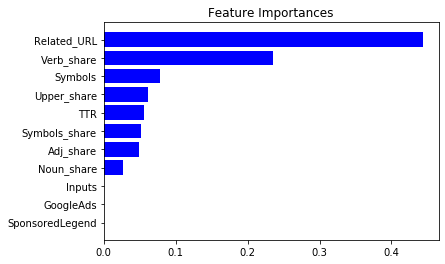

In [8]:
X_features = list(X_train.drop(columns=['Link']).columns)
rf_importances = RFmodel.feature_importances_
indices = np.argsort(rf_importances)


fig, ax = plt.subplots()
plt.yticks(range(len(indices)), [X_features[i] for i in indices])
ax.barh(range(len(indices)), rf_importances[indices], color='b', align='center')
ax.set(title = 'Feature Importances')
plt.show()

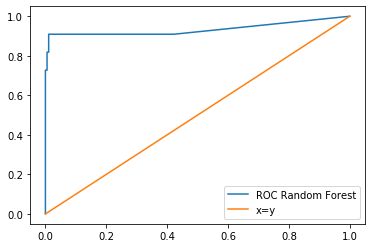

In [9]:
# plot lines
fpr, tpr, _ = metrics.roc_curve(y_test,  y_probs)

plt.plot(fpr,tpr,label="ROC Random Forest")
plt.plot(fpr, fpr, label = "x=y")
plt.legend()
plt.show()

In [10]:
def assess_classifier(pred_prob, y_true, threshold=None, L_FP=100, L_FN=100):
    #Assumes y_true is in 0,1
    if threshold is None:
        threshold = L_FP/(L_FP+L_FN)
    #check total loss
    guess_at_threshold = np.where(pred_prob > threshold, 1, 0)
    #get accuracy at 0.5 threshold
    accuracy_50 = np.mean(y_true == np.where(pred_prob > 0.5, 1, 0))
    #get accuracy at the specified threshold
    accuracy_thresh = np.mean(y_true == guess_at_threshold)
    
    fpr, tpr, _ = roc_curve(y_true, pred_prob)
    auc = metrics.auc(fpr, tpr)
    return({
        'accuracy_50': accuracy_50,
        'accuracy_thresh': accuracy_thresh,
        'auc': auc
           })

In [11]:
assess_classifier(y_probs,y_test)

{'accuracy_50': 0.9848484848484849,
 'accuracy_thresh': 0.9848484848484849,
 'auc': 0.9338842975206612}

In [12]:
LR_model=LogisticRegression(penalty='none').fit(X_train.drop(columns=['Link']), y_train)

y_probs_LR=LR_model.predict_proba(X_test.drop(columns=['Link']))[:,1]
yhat_LR=LR_model.predict(X_test.drop(columns=['Link']))


/Users/andresgarrido/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
### Comparison

X_test['Probs']=y_probs
X_test['ProbsLR']=y_probs_LR
X_test['Pred']=yhat
X_test['PredLR']=yhat_LR
X_test['Actual_value']=y_test
X_test.sort_values(by=['Probs'],ascending=False).head(50)


,Link,Related_URL,SponsoredLegend,GoogleAds,Inputs,TTR,Upper_share,Symbols,Symbols_share,Noun_share,Adj_share,Verb_share,Probs,ProbsLR,Pred,PredLR,Actual_value
88,https://cfe-recibos.com.mx,1,0,0,0,0.279918,0.023793,41,0.006919,0.339352,0.063112,0.091630,0.894,1.000000e+00,1,1,1
364,https://www.consultarecibocfe.mx,1,0,0,0,0.392494,0.021100,30,0.008013,0.357906,0.049145,0.083600,0.858,1.000000e+00,1,1,1
245,https://recibodeluzmexico.com.mx,1,0,0,0,0.529823,0.058539,27,0.007250,0.398228,0.046992,0.070623,0.782,9.942488e-01,1,1,1
241,https://recibo-cfe.mx,1,0,0,0,0.413924,0.032053,30,0.007070,0.459816,0.043601,0.071176,0.780,1.000000e+00,1,1,1
242,https://recibocfe.com.mx,1,0,0,0,0.425306,0.026563,72,0.019923,0.270338,0.070282,0.098783,0.772,1.000000e+00,1,1,1
90,https://cfeluz.com.mx,1,0,0,0,0.467113,0.046055,28,0.011940,0.494670,0.041791,0.063966,0.656,9.999919e-01,1,1,1
62,https://appcfecontigo.com.mx,1,0,0,0,0.524476,0.077166,15,0.005261,0.421606,0.053665,0.062434,0.642,7.567646e-03,1,0,1
232,https://portal-cfe.com.mx,1,0,0,0,0.499781,0.015917,24,0.006586,0.392426,0.044457,0.081229,0.624,1.000000e+00,1,1,1
277,https://tarifasdeluz.mx,1,0,0,0,0.455951,0.066609,15,0.012976,0.352941,0.069204,0.053633,0.448,4.246472e-06,0,0,0
92,https://cferecibos.com.mx,1,0,0,0,0.470364,0.010800,5,0.001038,0.470613,0.037175,0.066044,0.268,9.979470e-01,0,1,1
